# This extra practice isn't part of the course
### I'm practicing course concepts on my own

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn

plt.style.use("ggplot")
tf.random.set_seed(1)

In [3]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", label="Training Data")
    plt.scatter(test_data, test_labels, c="green", label="Testing Data")
    plt.scatter(test_data, predictions, c="red", label="Predictions")
    plt.legend()
    plt.show()


def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

# Boston house prices (regression)

In [5]:
# load the dataset
train, test = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)
x_train, y_train = train
x_test, y_test = test

## Labels
[source 1](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/notebook)
[source 2](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B -  1000(Bk - 0.63)^2 where Bk is the proportion of Black population by town. So gross that this is a factor that impacts house prices
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's

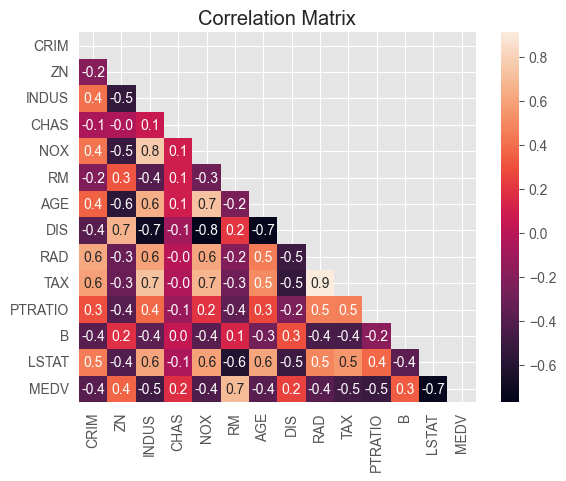

In [22]:
# label the data so I can put it in a dataframe for visualizations
train_with_mdev_arr = np.concatenate((x_train, y_train[:, np.newaxis]),
                                     axis=1)  # put x train and y train together (dataset was pre-split)
train_with_mdev_df = pd.DataFrame(train_with_mdev_arr)
test_with_mdev_arr = np.concatenate((x_test, y_test[:, np.newaxis]), axis=1)
test_with_mdev_df = pd.DataFrame(test_with_mdev_arr)
data = pd.concat([train_with_mdev_df, test_with_mdev_df])
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Create a heatmap
corr = data.corr()
mask = np.triu(corr)
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
# build the model
house_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, name="hidden_layer1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Boston_housing_model")

# compile
house_model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# fit
history = house_model.fit(x_train, y_train, epochs=100, verbose=0)

# predict
y_pred = house_model.predict(x_test)

4/4 [==============================] - 0s 579us/step


## Interpreting and visualizing results

In [14]:
print(f"Test data mean = {y_test.mean()}, standard deviation = {y_test.std()}")
print(f"Prediction mean = {y_pred.mean()}, standard deviation = {y_pred.std()}\n")

print("Prediction metrics:")
print(f"Mean absolute error = {mae(y_test, y_pred)}")
print(f"Mean squared error = {mse(y_test, y_pred)}")

Test data mean = 22.64019607843137, standard deviation = 8.438128449262853
Prediction mean = 21.122663497924805, standard deviation = 4.9351325035095215

Prediction metrics:
Mean absolute error = 4.805500030517578
Mean squared error = 54.390865325927734


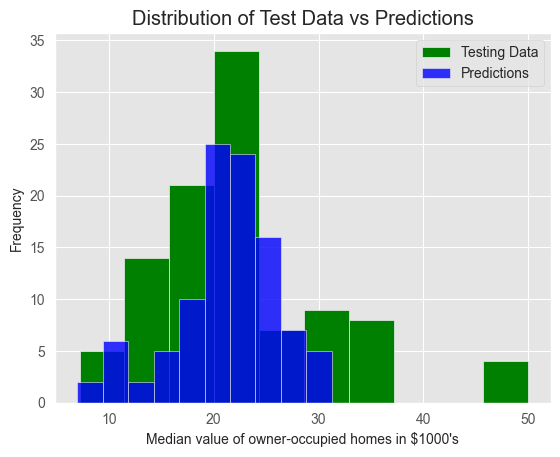

In [15]:
# compare distribution of test and prediction
plt.hist(y_test, color="green", label="Testing Data")
plt.hist(y_pred, color="blue", alpha=0.8, label="Predictions")
plt.title("Distribution of Test Data vs Predictions")
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

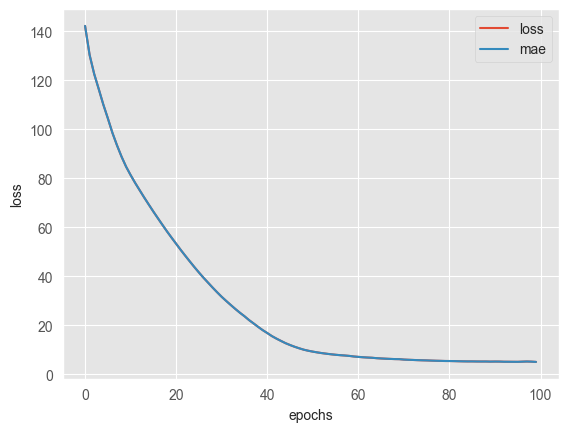

In [16]:
# plot the training improvement over time
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

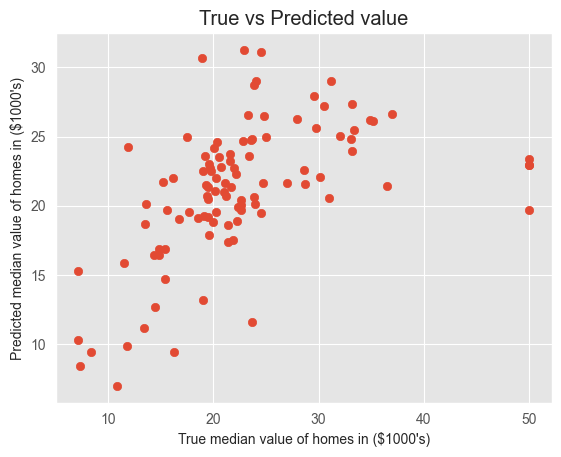

In [18]:
# plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("True median value of homes in ($1000's)")
plt.ylabel("Predicted median value of homes in ($1000's)")
plt.title("True vs Predicted value")
plt.show()